# Inicio do Trabalho 2
  - Vou reutilizar parte do Trabalho 1 para filtrar os dados que eu quero trabalhar e fazem mais sentido

In [135]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Carregando o dataset
df = pd.read_excel('dataset.xlsx')

A primeira coisa que eu preciso fazer é filtar as colunas que não fazem sentido eu trabalhar ou usar

In [136]:
# Removendo colunas que não serão utilizadas
df = df.drop(columns=['Patient ID', 'Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)'])

In [137]:
# Mapeando os valores categoricos para numericos
 
for col in df.columns:
    if df[col].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df[col].values))
        df[col] = lbl.transform(df[col].values)

In [138]:
# Removendo Colunas com valores faltantes, threshold de 90%
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]

In [139]:
#  preenchendo linha com valores faltantes com a mediana

df = df.fillna(df.median())

In [141]:
#  por medida de segurança, decidi criar um axuliar do dataset tratado
df.to_excel('dataset_tratado.xlsx', index=False)

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import preprocessing

In [143]:
df_aux = pd.read_excel('dataset_tratado.xlsx')
df_aux = df_aux.drop(columns=['SARS-Cov-2 exam result'])
df_normalized = preprocessing.normalize(df_aux)

X = df_normalized
Y = df['SARS-Cov-2 exam result'] # target

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


In [145]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [146]:
print('Cauculando a acurácia do modelo de árvore de decisão\n\n')

prds = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, prds).ravel()
print(f'tn {tn}, fp {fp}, fn {fn}, tp {tp}', '\n\n',
      'Accuracy:', (accuracy_score(y_test, prds)), '\n\n',
      'Classification Report:\n', (classification_report(y_test, prds)))

Cauculando a acurácia do modelo de árvore de decisão


tn 1505, fp 27, fn 150, tp 12 

 Accuracy: 0.8955135773317592 

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1532
           1       0.31      0.07      0.12       162

    accuracy                           0.90      1694
   macro avg       0.61      0.53      0.53      1694
weighted avg       0.85      0.90      0.87      1694



## Segunda parte do trabalho
  - Segundo algoritmo de comparação -> KNN

In [157]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1012)

In [149]:
clf = KNeighborsClassifier(n_neighbors=5).fit(X, Y)

In [150]:
y_pred = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9028448738593666


# Parte 3
  - Terceiro algoritmo de classificação -> K-means usando K-means++ 
  

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=3,init = 'k-means++', n_init = 'auto')
pred_y = model.fit_predict(df_normalized)

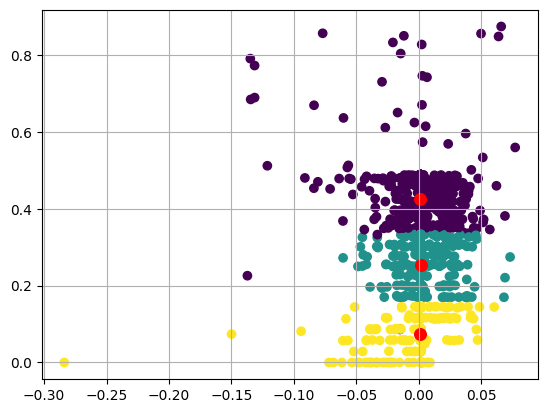

In [ ]:
plt.scatter(df_normalized[:,1], df_normalized[:,0] , c = pred_y)
plt.grid()
plt.scatter(model.cluster_centers_[:,1],model.cluster_centers_[:,0], s = 70, c = 'red')
plt.savefig('2-clusters.png')